In [52]:
import pandas as pd
import sqlite3

In [53]:
# SQLite veritabanı bağlantısını oluşturun
conn = sqlite3.connect('power.db')

In [54]:
# Veri setini okuyun ve SQLite veritabanına aktarın
data = pd.read_csv('/content/sample_data/power.csv')
data.to_sql('power', conn, if_exists='replace', index=False)

811

In [55]:
# SQL sorguları

#Tabloya göz atalım:
query = "SELECT * from power"
tables = pd.read_sql(query, conn)
tables

,il,ilce,mahalle_koy,kaynak_turu,kurulu_guc_kwe
0,Konya,Sarayönü,Hatıp,Güneş,200.0
1,Konya,Karapınar,Gaziosmanpaşa,Güneş,500.0
2,Konya,Ereğli,Zengen,Güneş,500.0
3,Konya,Emirgazi,Merkez,Güneş,500.0
4,Konya,Emirgazi,Merkez,Güneş,500.0
...,...,...,...,...,...
806,Konya,Karatay,Zivecik,Güneş,90.0
807,Konya,Karatay,Fevziçakmak,Güneş,84.0
808,Konya,Ereğli,Ziyagökalp,Güneş,40.0
809,Konya,Karatay,Fevziçakmak,Güneş,99.9


In [56]:
#Her ilçe için kurulu güç:
query1 = "SELECT ilce, SUM(kurulu_guc_kwe) AS toplam_kurulu_guc FROM power GROUP BY ilce ORDER BY toplam_kurulu_guc DESC;"
tables1 = pd.read_sql(query1, conn)
tables1

,ilce,toplam_kurulu_guc
0,Karatay,94524.776
1,Çumra,90644.000
2,Selçuklu,40569.000
3,Kadınhanı,30662.000
4,Karapınar,30537.400
5,Ereğli,27206.510
6,Altınekin,25745.050
7,Seydişehir,25308.743
8,Beyşehir,24030.680
9,Meram,23564.000


In [57]:
# Toplam kurulu gücü en yüksek 5 ilçe
query2 = "SELECT ilce, SUM(kurulu_guc_kwe) AS toplam_kurulu_guc FROM power GROUP BY ilce ORDER BY toplam_kurulu_guc DESC LIMIT 5;"
tables2 = pd.read_sql(query2, conn)
tables2

,ilce,toplam_kurulu_guc
0,Karatay,94524.776
1,Çumra,90644.000
2,Selçuklu,40569.000
3,Kadınhanı,30662.000
4,Karapınar,30537.400


<ipython-input-58-056ccbe67ea8>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ilce', y='kurulu_guc_kwe', data=data, estimator=sum, ci=None)


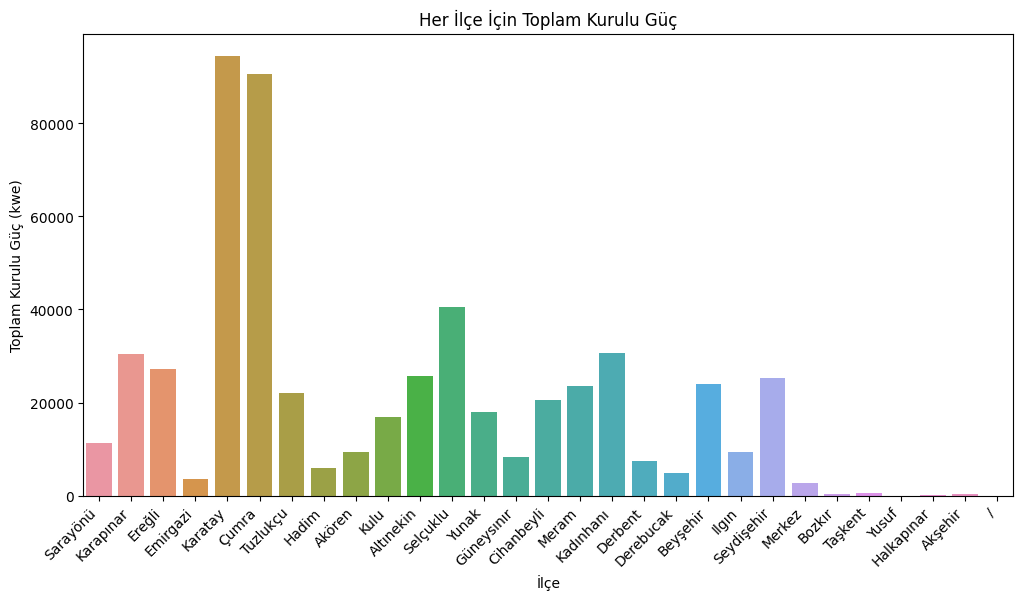

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV dosyasını okuma
data = pd.read_csv('/content/sample_data/power.csv')

# Her ilçe için toplam kurulu güç çubuk grafiği
plt.figure(figsize=(12, 6))
sns.barplot(x='ilce', y='kurulu_guc_kwe', data=data, estimator=sum, ci=None)
plt.title('Her İlçe İçin Toplam Kurulu Güç')
plt.xlabel('İlçe')
plt.ylabel('Toplam Kurulu Güç (kwe)')
plt.xticks(rotation=45, ha='right')
plt.show()

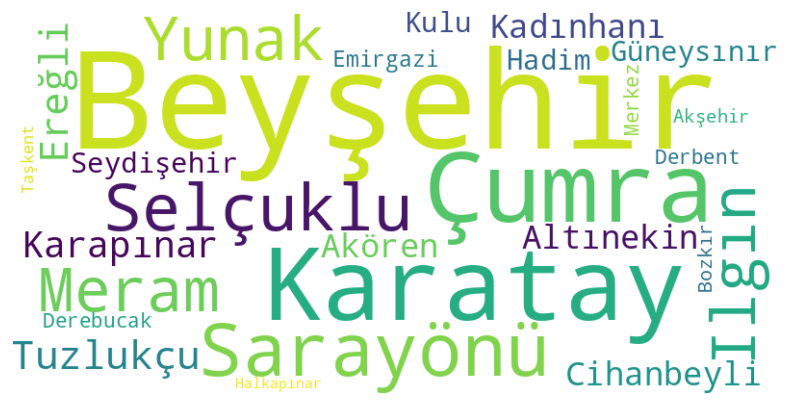

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Veri setini ilçelerin kurulu güce göre sırala
data_sorted = data.sort_values(by='kurulu_guc_kwe', ascending=True)

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', min_font_size=10).generate_from_frequencies(dict(zip(data_sorted['ilce'], data_sorted['kurulu_guc_kwe'])))

# Kelime bulutunu göster
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


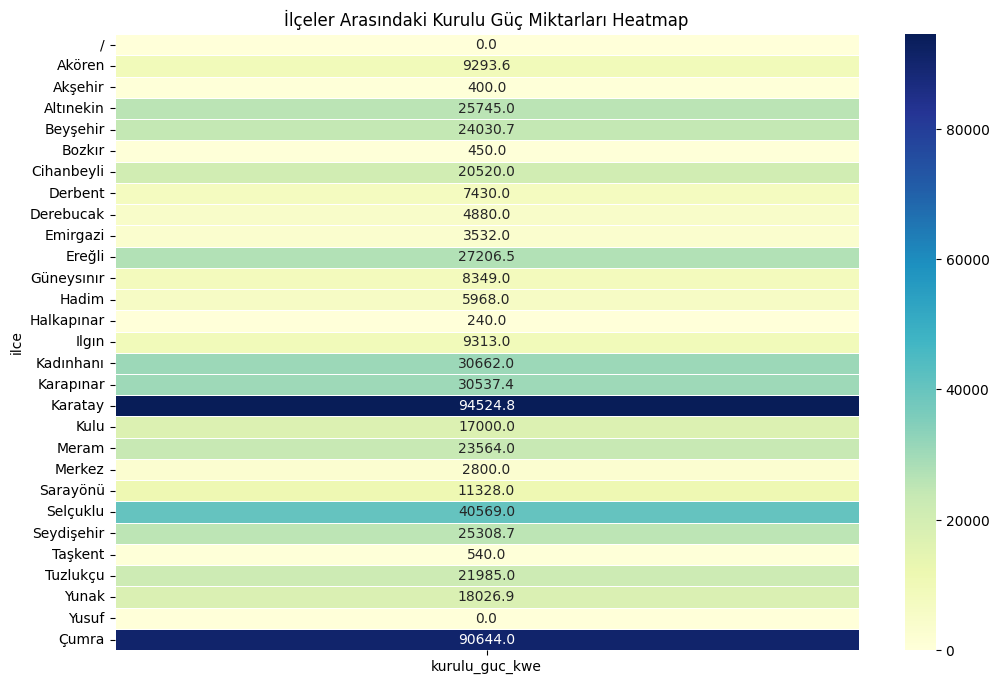

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# İlçeler arasındaki kurulu güç miktarlarını içeren bir DataFrame oluştur
ilce_kurulu_guc = data.pivot_table(values='kurulu_guc_kwe', index='ilce', aggfunc='sum')

# Heatmap oluştur
plt.figure(figsize=(12, 8))
sns.heatmap(ilce_kurulu_guc, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('İlçeler Arasındaki Kurulu Güç Miktarları Heatmap')
plt.show()